In [3]:
import pandas as pd

data = pd.read_csv('lego (1).csv')

data.head()

,id,name,themegroup,theme,subtheme,year,pieces,minifigs,package,retail_price
0,100STORES-1,100 Stores minifigure,Miscellaneous,Promotional,LEGO brand stores,2019.0,NaN,0,Blister pack,NaN
1,10264-1,Corner Garage,Model making,Creator Expert,Modular Buildings,2019.0,2569.0,6,Box,199.99
2,10265-1,Ford Mustang,Model making,Creator Expert,Vehicles,2019.0,1471.0,0,Box,149.99
3,10766-1,Woody & RC,Licensed,Toy Story,Toy Story 4,2019.0,69.0,0,Box,9.99
4,10769-1,RV Vacation,Licensed,Toy Story,Toy Story 4,2019.0,178.0,0,Box,34.99


In [5]:
print(data.head())

print(data.info())

print(data.describe())


            id                   name     themegroup           theme  \
0  100STORES-1  100 Stores minifigure  Miscellaneous     Promotional   
1      10264-1          Corner Garage   Model making  Creator Expert   
2      10265-1           Ford Mustang   Model making  Creator Expert   
3      10766-1             Woody & RC       Licensed       Toy Story   
4      10769-1            RV Vacation       Licensed       Toy Story   

            subtheme    year  pieces  minifigs       package  retail_price  
0  LEGO brand stores  2019.0     NaN         0  Blister pack           NaN  
1  Modular Buildings  2019.0  2569.0         6           Box        199.99  
2           Vehicles  2019.0  1471.0         0           Box        149.99  
3        Toy Story 4  2019.0    69.0         0           Box          9.99  
4        Toy Story 4  2019.0   178.0         0           Box         34.99  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12214 entries, 0 to 12213
Data columns (total 10 column

In [7]:
print(data.isnull().sum())

data_cleaned = data.dropna()

data_filled = data.fillna(0)

id                 0
name               0
themegroup         0
theme              1
subtheme        3763
year               1
pieces          1089
minifigs           0
package         3539
retail_price    4365
dtype: int64


In [9]:
data_no_duplicates = data.drop_duplicates()

In [13]:
print(data.columns)

Index(['id', 'name', 'themegroup', 'theme', 'subtheme', 'year', 'pieces',
       'minifigs', 'package', 'retail_price'],
      dtype='object')


In [15]:
data.columns = data.columns.str.strip()

print(data.columns)


Index(['id', 'name', 'themegroup', 'theme', 'subtheme', 'year', 'pieces',
       'minifigs', 'package', 'retail_price'],
      dtype='object')


In [19]:
print(data.columns)

Index(['id', 'name', 'themegroup', 'theme', 'subtheme', 'year', 'pieces',
       'minifigs', 'package', 'retail_price'],
      dtype='object')


In [21]:
print(data['theme'].nunique())

print(data['theme'].value_counts())

139
theme
Duplo                        1050
Town                          640
Star Wars                     631
Gear                          585
Collectable Minifigures       565
                             ... 
Avatar The Last Airbender       2
Primo                           2
The Simpsons                    2
Boost                           1
CITY                            1
Name: count, Length: 139, dtype: int64


In [23]:
average_price = data['retail_price'].mean()
print(f"The average retail price of LEGO sets is: ${average_price:.2f}")


The average retail price of LEGO sets is: $28.55


In [25]:
filtered_data = data[(data['year'] >= 2010) & (data['year'] <= 2020)]
print(filtered_data.head())

            id                   name     themegroup           theme  \
0  100STORES-1  100 Stores minifigure  Miscellaneous     Promotional   
1      10264-1          Corner Garage   Model making  Creator Expert   
2      10265-1           Ford Mustang   Model making  Creator Expert   
3      10766-1             Woody & RC       Licensed       Toy Story   
4      10769-1            RV Vacation       Licensed       Toy Story   

            subtheme    year  pieces  minifigs       package  retail_price  
0  LEGO brand stores  2019.0     NaN         0  Blister pack           NaN  
1  Modular Buildings  2019.0  2569.0         6           Box        199.99  
2           Vehicles  2019.0  1471.0         0           Box        149.99  
3        Toy Story 4  2019.0    69.0         0           Box          9.99  
4        Toy Story 4  2019.0   178.0         0           Box         34.99  


In [27]:
average_price_by_theme = data.groupby('theme')['retail_price'].mean()
print(average_price_by_theme)

theme
4 Juniors          17.222222
Action Wheelers    26.444444
Adventurers        19.320000
Agents             42.297692
Alpha Team         20.000000
                     ...    
Wizarding World    86.545556
World City         35.857143
World Racers       32.240000
Xtra                3.990000
Znap               16.833333
Name: retail_price, Length: 139, dtype: float64


In [29]:
top_5_expensive = data.nlargest(5, 'retail_price')
print(top_5_expensive[['name', 'retail_price']])

                                        name  retail_price
1434                       Millennium Falcon        799.99
3425              Identity and Landscape Kit        789.99
3426                         Connections Kit        754.99
2065                              Death Star        499.99
5944  Ultimate Collector's Millennium Falcon        499.99


In [31]:
theme_with_most_sets = data['theme'].value_counts().idxmax()
print(f"The theme with the most sets is: {theme_with_most_sets}")

The theme with the most sets is: Duplo


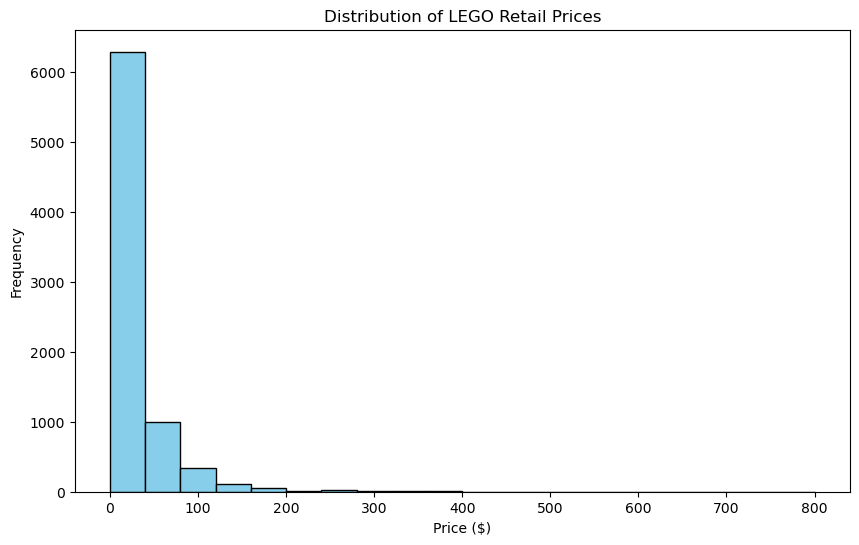

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(data['retail_price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of LEGO Retail Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

In [35]:
filtered_data.to_csv('filtered_lego_sets.csv', index=False)